In [5]:
import pandas as pd
aktual = pd.read_csv('klaster-aktual.csv')
prediksi = pd.read_csv('klaster-prediksi.csv')
aktual = pd.DataFrame(aktual, columns=['skor-label-aspek-aktual'])
prediksi = pd.DataFrame(prediksi, columns=['label-klaster'])

In [6]:

unique_values_kolom1 = aktual['skor-label-aspek-aktual'].unique()
unique_values_kolom1

array([0, 2, 3, 1])

In [7]:
# aktual.head(10)

In [8]:
unique_values_kolom2 = prediksi['label-klaster'].unique()
unique_values_kolom2

array([0, 3, 2, 1])

In [9]:
# prediksi.head(10)

Akurasi: 52.46%
Presisi: 0.83
Recall: 0.52
F1 Score: 0.61


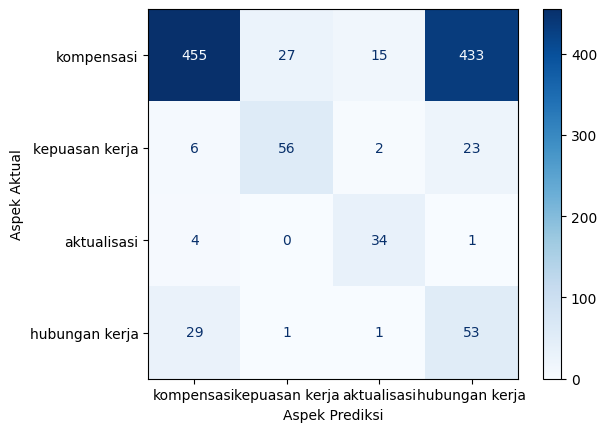

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Ekstrak nilai aktual dan prediksi dari kolom DataFrame
y_actual = aktual['skor-label-aspek-aktual']
y_pred = prediksi['label-klaster']

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_actual, y_pred)

# Definisikan label aspek
aspek_labels = ['kompensasi', 'kepuasan kerja', 'aktualisasi', 'hubungan kerja']

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=aspek_labels)
disp.plot(cmap="Blues")

# Mengubah label sumbu X dan Y
plt.xlabel('Aspek Prediksi')  # Mengubah label X menjadi 'Aspek Prediksi'
plt.ylabel('Aspek Aktual')    # Mengubah label Y menjadi 'Aspek Aktual'

# Hitung metrik evaluasi
accuracy = accuracy_score(y_actual, y_pred)
precision = precision_score(y_actual, y_pred, average='weighted')  # Menggunakan rata-rata berbobot untuk multi-kelas
recall = recall_score(y_actual, y_pred, average='weighted')
f1 = f1_score(y_actual, y_pred, average='weighted')

# Tampilkan hasil metrik evaluasi
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Menampilkan plot
plt.show()


Akurasi: 0.84
Presisi: 0.86
Recall: 0.84
F1 Score: 0.82


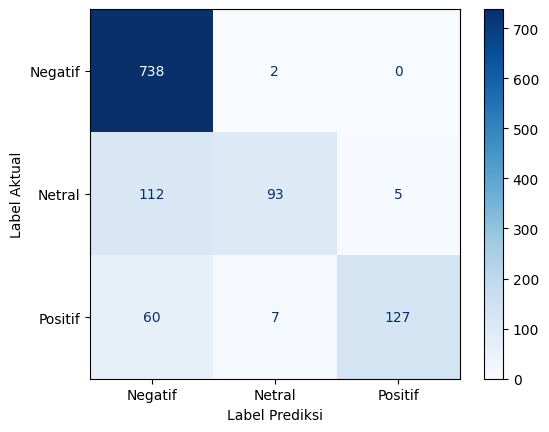

In [4]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Membaca data aktual dan prediksi
klasifikasiaktual = pd.read_csv('dataset-berlabel.csv')
klasifikasiprediksi = pd.read_csv('hasil_prediksi.csv')

# Mengambil kolom label
klasifikasiaktual = pd.DataFrame(klasifikasiaktual, columns=['label'])
klasifikasiprediksi = pd.DataFrame(klasifikasiprediksi, columns=['label'])

# Ekstrak nilai aktual dan prediksi dari kolom DataFrame
y_actual = klasifikasiaktual['label']
y_pred = klasifikasiprediksi['label']

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_actual, y_pred)
classes = sorted(set(y_actual) | set(y_pred))  # Semua kelas unik dari data aktual dan prediksi

# # Tampilkan confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

# Hitung akurasi
accuracy = accuracy_score(y_actual, y_pred)
# print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Akurasi: {accuracy :.2f}")

# Hitung presisi, recall, dan F1 score
precision = precision_score(y_actual, y_pred, average='weighted')  # Rata-rata berbobot untuk multi-kelas
recall = recall_score(y_actual, y_pred, average='weighted')
f1 = f1_score(y_actual, y_pred, average='weighted')

# Tampilkan nilai presisi, recall, dan F1 score
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap="Blues")

# Mengubah label sumbu X dan Y
plt.xlabel('Label Prediksi')  # Mengubah label X menjadi 'Prediksi'
plt.ylabel('Label Aktual')    # Mengubah label Y menjadi 'Aktual'

plt.show()


Precision: 0.78
Recall: 0.79
F1-Score: 0.78

Accuracy: 0.7860262008733624
Classification Report:

               precision    recall  f1-score   support

     Negatif       0.87      0.91      0.89       150
      Netral       0.49      0.50      0.49        38
     Positif       0.75      0.59      0.66        41

    accuracy                           0.79       229
   macro avg       0.70      0.67      0.68       229
weighted avg       0.78      0.79      0.78       229



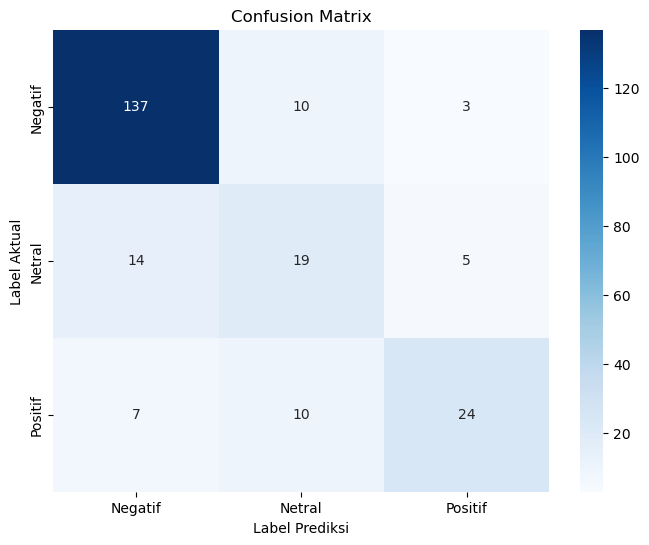

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Membaca dataset
data = pd.read_csv('dataset-berlabel-aspek.csv')

# Preprocessing teks (case folding, tokenization, dsb.) bisa dilakukan di sini
# data['teks'] = data['teks'].apply(lambda x: preprocessing(x, slang_dict, stopwords, kamus_indonesia, stemmer))

X = data['teks']
y = data['label']

smote = SMOTE(random_state=42)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Memprediksi hasil untuk data testing
y_pred = model.predict(X_test_tfidf)

# Menghitung precision, recall, dan F1-score secara keseluruhan menggunakan average='weighted'
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Evaluasi model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n\n", classification_report(y_test, y_pred))

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())  # Mengambil label dari data

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Aktual')
plt.title('Confusion Matrix')
plt.show()